In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
dataset=pd.read_csv('daily-total-female-births-CA.csv')
dataset.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [23]:
dataset.shape

(365, 2)

In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    365 non-null    object
 1   births  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [25]:
dataset.isnull().sum()

date      0
births    0
dtype: int64

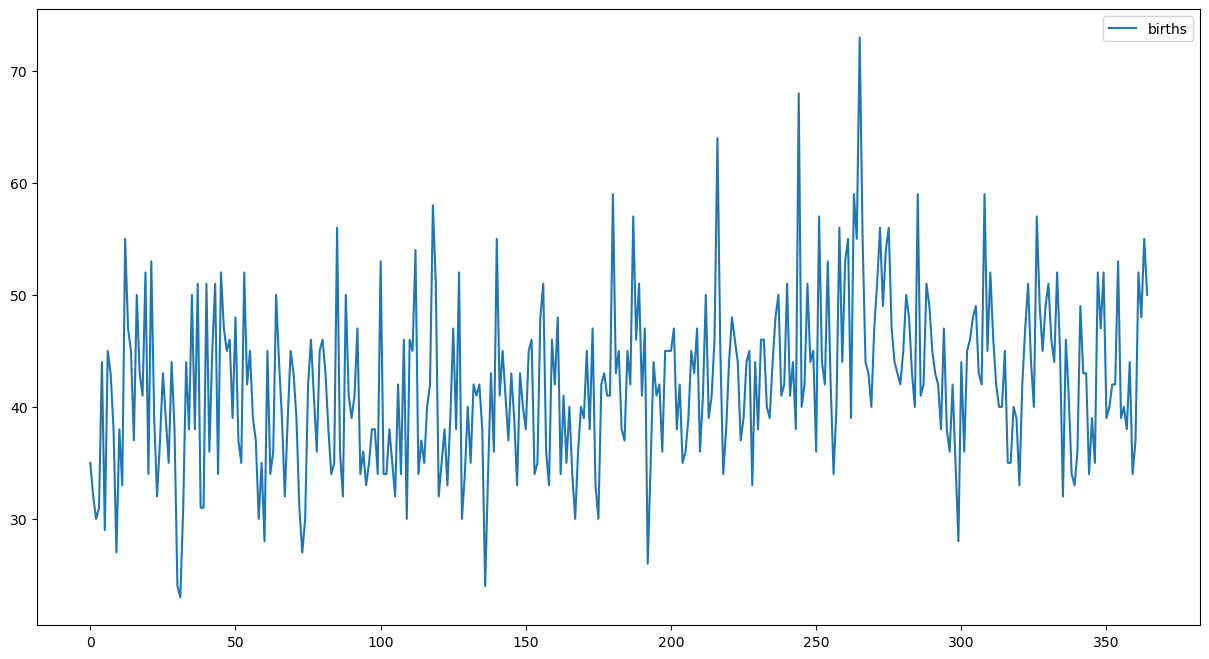

In [26]:
dataset.plot(figsize=(15, 8))
plt.show()

In [27]:
dataset.columns = ['ds','y']
dataset['ds']=pd.to_datetime(dataset['ds'])

In [28]:
#!pip install prophet
from prophet import Prophet

In [29]:
model=Prophet()
model.fit(dataset)

23:38:11 - cmdstanpy - INFO - Chain [1] start processing
23:38:33 - cmdstanpy - INFO - Chain [1] done processing


In [32]:
future_dates=model.make_future_dataframe(periods=365)
prediction=model.predict(future_dates)
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1959-01-01,38.144325,30.654490,47.666271,38.144325,38.144325,1.107330,1.107330,1.107330,1.107330,1.107330,1.107330,0.0,0.0,0.0,39.251655
1,1959-01-02,38.166785,29.002892,46.334031,38.166785,38.166785,0.026515,0.026515,0.026515,0.026515,0.026515,0.026515,0.0,0.0,0.0,38.193300
2,1959-01-03,38.189244,28.368048,46.149537,38.189244,38.189244,-0.760488,-0.760488,-0.760488,-0.760488,-0.760488,-0.760488,0.0,0.0,0.0,37.428756
3,1959-01-04,38.211704,26.700252,44.070052,38.211704,38.211704,-3.085682,-3.085682,-3.085682,-3.085682,-3.085682,-3.085682,0.0,0.0,0.0,35.126022
4,1959-01-05,38.234163,28.554526,46.251953,38.234163,38.234163,-0.853687,-0.853687,-0.853687,-0.853687,-0.853687,-0.853687,0.0,0.0,0.0,37.380476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1960-12-26,46.837118,36.854688,54.722459,45.531809,48.035304,-0.853687,-0.853687,-0.853687,-0.853687,-0.853687,-0.853687,0.0,0.0,0.0,45.983431
726,1960-12-27,46.843239,40.101967,57.353977,45.535059,48.045722,1.743759,1.743759,1.743759,1.743759,1.743759,1.743759,0.0,0.0,0.0,48.586998
727,1960-12-28,46.849359,39.619345,57.555369,45.538309,48.055588,1.822252,1.822252,1.822252,1.822252,1.822252,1.822252,0.0,0.0,0.0,48.671611
728,1960-12-29,46.855480,39.472739,57.395386,45.541560,48.064435,1.107330,1.107330,1.107330,1.107330,1.107330,1.107330,0.0,0.0,0.0,47.962810


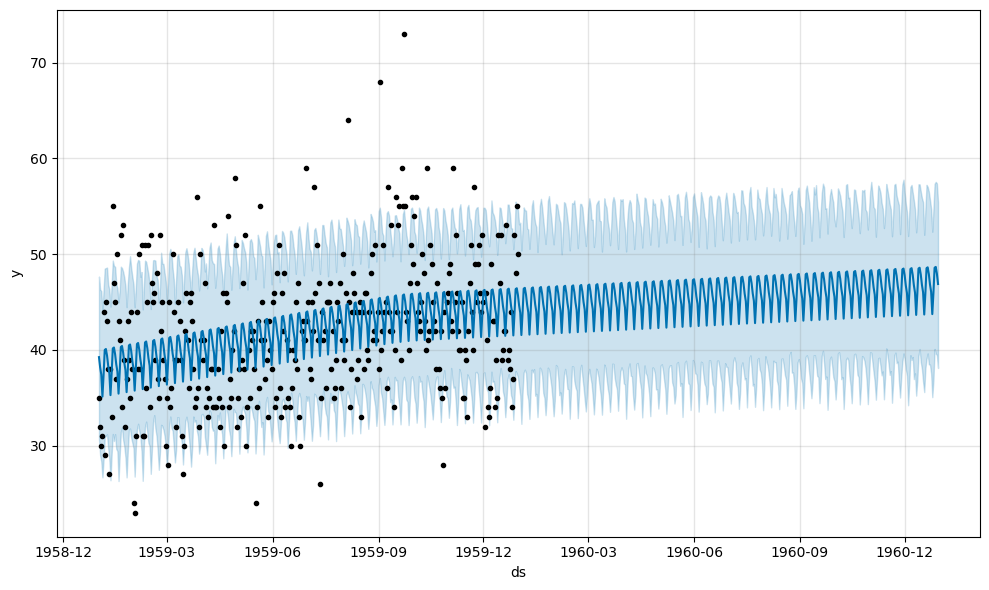

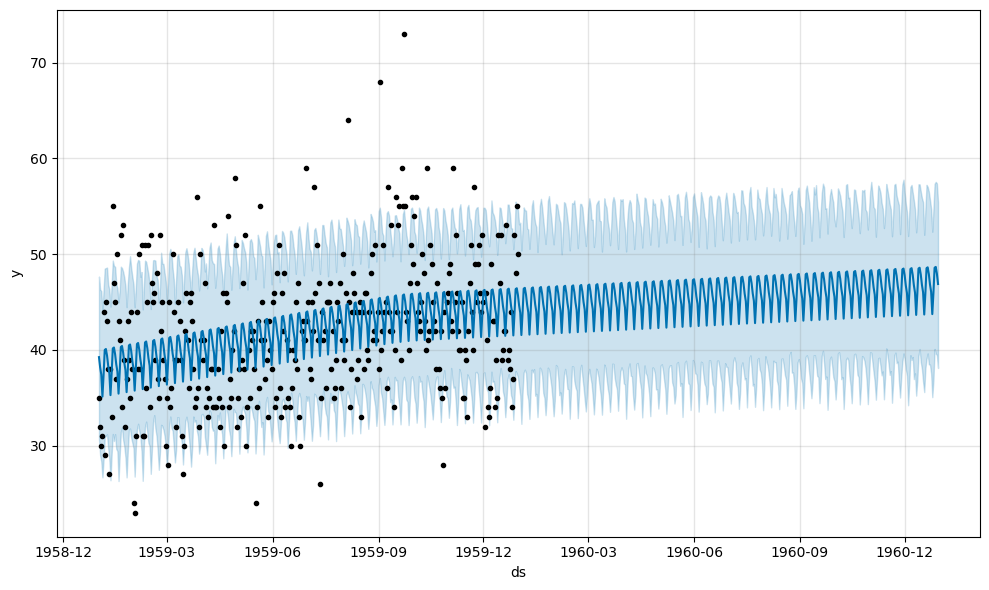

In [33]:
model.plot(prediction)

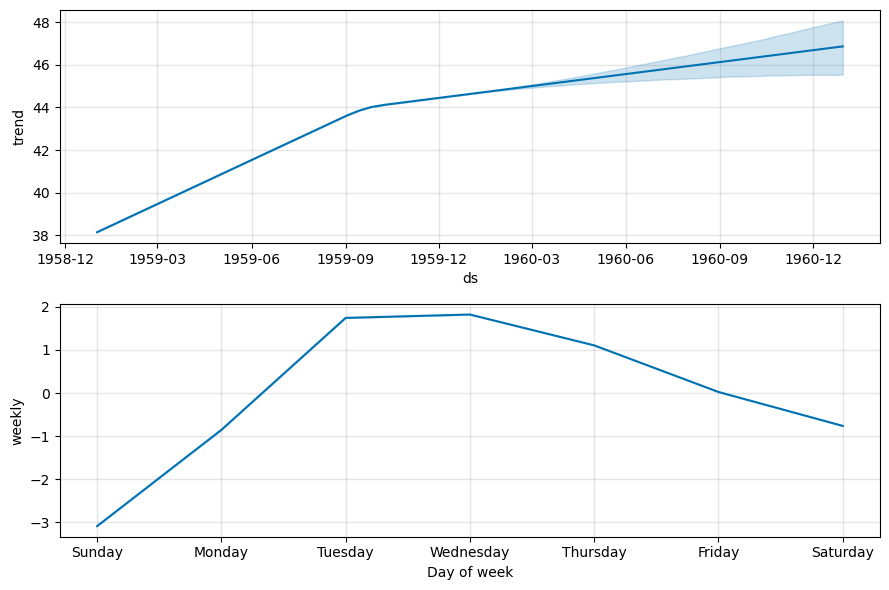

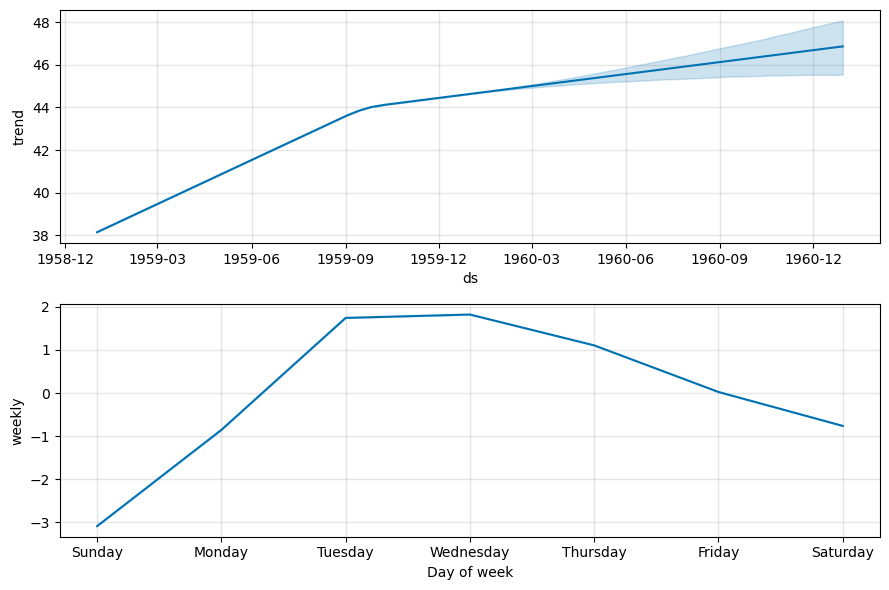

In [34]:
model.plot_components(prediction)